In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
import statsmodels.formula.api  as smf
from scipy.stats import norm
import math

In [4]:
data = np.array([4,3,4,5,5,2,3,1,4,0,1,5,5,6,5,4,4,5,3,4])

(array([1., 2., 1., 3., 6., 6., 1.]),
 array([0.        , 0.85714286, 1.71428571, 2.57142857, 3.42857143,
        4.28571429, 5.14285714, 6.        ]),
 <a list of 7 Patch objects>)

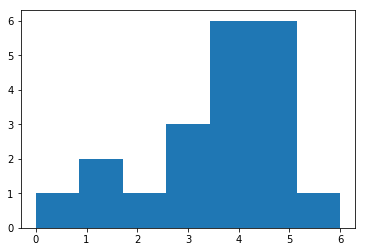

In [8]:
plt.hist(data,bins=7)

In [21]:
def logL(data, q):
    return (data * np.log(q) + (8 - data) * np.log(1 - q)).sum()

In [20]:
logL(0.7)

-130.78290488388387

In [25]:
def mcmc_metropokis(data, q_start, number_of_samples):
    q_current = q_start
    ll_current = logL(data, q_start)
    q_history = []
    ll_history = []
    
    for r1, r2 in zip(np.random.random(number_of_samples), np.random.random(number_of_samples)):
        q_new = q_current + 0.01 if r1 > 0.5 else q_current - 0.01
        if q_new <= 0.01:
            q_new = 0.02
        elif q_new >= 0.99:
            q_new = 0.98
        ll_new = logL(data, q_new)
        
        if ll_current < ll_new or (math.exp(ll_new - ll_current) > r2):
            q_current = q_new
            ll_current = ll_new
        q_history.append(q_current)
        ll_history.append(ll_current)
        
    return q_current, ll_current, q_history, ll_history

In [26]:
q, ll, q_hist, ll_hist = mcmc_metropokis(data, 0.3, 100)

In [27]:
q

0.4300000000000001

In [28]:
ll

-110.5141610108587

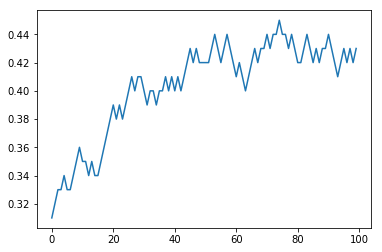

In [29]:
plt.plot(np.arange(100), np.array(q_hist))

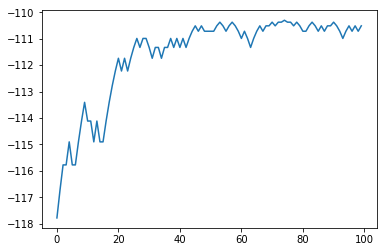

In [30]:
plt.plot(np.arange(100), np.array(ll_hist))

(array([ 2.,  4., 10.,  2.,  1.,  8., 11., 30., 21., 11.]),
 array([0.31 , 0.324, 0.338, 0.352, 0.366, 0.38 , 0.394, 0.408, 0.422,
        0.436, 0.45 ]),
 <a list of 10 Patch objects>)

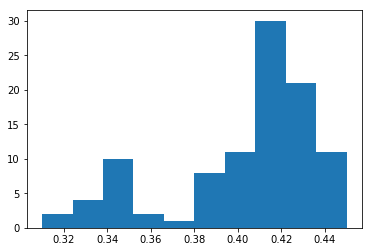

In [31]:
plt.hist(q_hist)